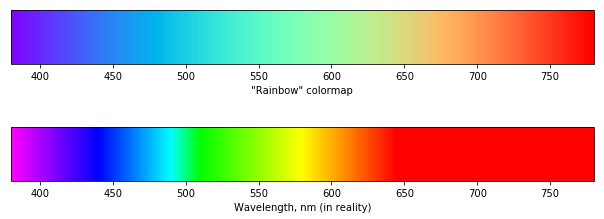

In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
myrainbow = make_colormap(
    [(1,0,1), (0,0,1), (440.0-380)/400, (0,0,1), (0,1,1), (490.0-380)/400, (0,1,1),
     (0,1,0),(510.0-380)/400,(0,1,0),(1,1,0),(580.0-380)/400,(1,1,0),(1,0,0),(645.0-380)/400,(1,0,0)])

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
ax2 = fig.add_axes([0.05, 0.475, 0.9, 0.15])

cmap = mpl.cm.rainbow
norm = mpl.colors.Normalize(vmin=380, vmax=780)

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('"Rainbow" colormap')

cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=myrainbow,
                                norm=norm,
                                orientation='horizontal')
cb2.set_label('Wavelength, nm (in reality)')


plt.show()